## Testing models

In [28]:
%load_ext autoreload
%autoreload 2
from comet_ml import API
from dotenv import load_dotenv
from xgboost import XGBClassifier
import pandas as pd
from ift6758.models.utils import preprocess, predict_model
from ift6758.models.plotter import *
import os
from comet_ml import Experiment
from sklearn import metrics


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def download_model(register_name):
    load_dotenv()
    api = API()
    # Download a Registry Model:
    api.download_registry_model("princesslove", f"{register_name}", "1.0.0",
                                output_path="../comet_models/", expand=True)

In [3]:
url = 'https://drive.google.com/file/d/1kM__riNHRPx5GsyuOH3yhiql3OZvwmuP/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [4]:
df_test = df[df['season']==20192020]

## Question 3

# XGBOOST

## Question 5.1

In [5]:
register_name = 'question5-1-model'
experiment_name = 'question5.1'
download_model(register_name = register_name )

COMET INFO: Downloading registry model 'question5-1-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!


In [6]:
model_xgb_without_RDS = XGBClassifier()
model_xgb_without_RDS.load_model(f"../comet_models/{experiment_name}.json")

In [7]:
# preprocess
X_test, y_test ,df_test_preprocessed =  preprocess(df_test,features = ['distance','angle'], standarize=True)
y_test_pred_1,y_test_prob_1 = predict_model(model_xgb_without_RDS,X_test)

## Question 5.2

In [8]:
register_name = 'question5-2-without-grid-search-model'
experiment_name = 'question5.2_without_grid_search'
download_model(register_name = register_name )

COMET INFO: Downloading registry model 'question5-2-without-grid-search-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!


In [9]:
model_xgb_without_RDS = XGBClassifier()
model_xgb_without_RDS.load_model(f"../comet_models/{experiment_name}.json")

In [10]:
# preprocess
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed']
X_test, y_test ,df_train_preprocessed =  preprocess(df_test,features = list_features, standarize=True)
y_test_pred_2,y_test_prob_2 = predict_model(model_xgb_without_RDS,X_test)

## Plot ALL

In [11]:
y_test_pred_list= [y_test_pred_1,y_test_pred_2]
y_test_prob_list= [y_test_prob_1,y_test_prob_2]

model_names = ['model1','model2']

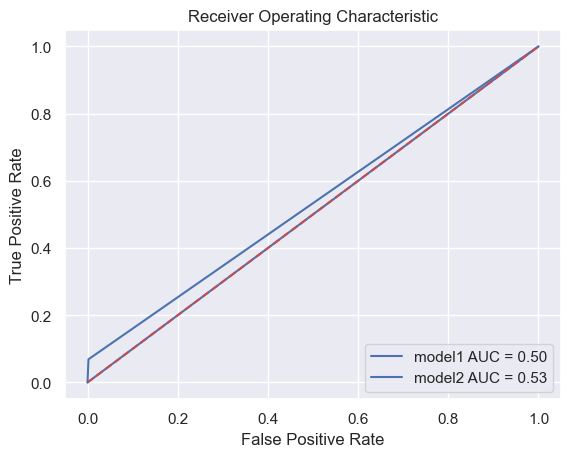

In [14]:
fig = log_ROC(y_test,y_test_pred_list,model_names=model_names)

<Figure size 640x480 with 0 Axes>

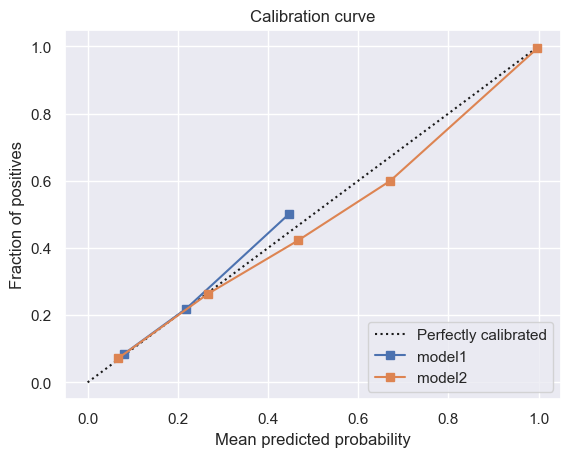

In [24]:
a = log_Calibration(y_test,y_test_prob_list,model_names=model_names)

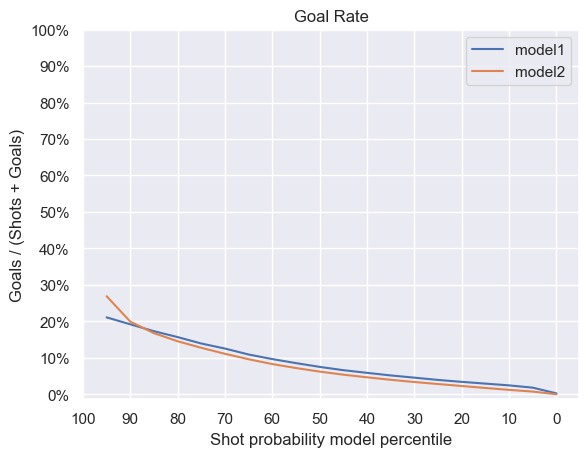

In [27]:
D = log_GoalRate(y_test_prob_list,model_names=model_names)

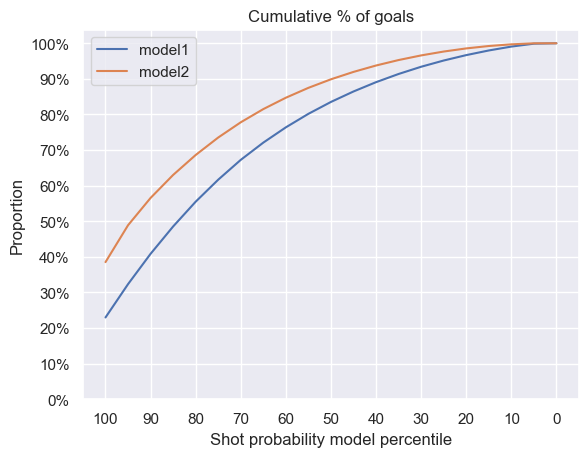

In [26]:
C = log_Cumulative(y_test_prob_list,model_names=model_names)

In [42]:
# TODO print les metrics 

def compute_metrics(y_true,y_preds,model_names):
    acc=[]
    recall = []
    precision = []
    f_score = []
    for y_pred, model_name in zip(y_preds, model_names):
        acc.append(metrics.accuracy_score(y_true,y_pred))
        recall.append(metrics.recall_score(y_true,y_pred,average='macro'))
        precision.append(metrics.precision_score(y_true,y_pred,average='macro'))
        f_score.append(metrics.f1_score(y_true,y_pred,average='macro'))

    dict_data = {
    'model_name':model_names,
    'Accuracy':acc,
    'Recall':recall,
    'Precision':precision,
    'f_score':f_score
    }
    return pd.DataFrame.from_dict(dict_data)


In [43]:
compute_metrics(y_test,y_test_pred_list,model_names)

,model_name,Accuracy,Recall,Precision,f_score
0,model1,0.903402,0.500074,0.951700,0.474772
1,model2,0.908201,0.533427,0.846233,0.539101


In [ ]:
# print les confusion matrix
matrix = metrics.confusion_matrix(y_true,y_pred)